In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import math
import gzip
from math import radians, cos, sin, asin, sqrt
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from __future__ import division


In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
saved_style_state = matplotlib.rcParams.copy()

In [4]:
filepath = "http://data.insideairbnb.com/australia/nsw/sydney/2017-04-03/visualisations/listings.csv"
print "loading sydney data"
filepath2 = "http://data.insideairbnb.com/australia/vic/melbourne/2017-04-03/visualisations/listings.csv"
print "loading melbourne data"


sydData = pd.read_csv(filepath)
melData = pd.read_csv(filepath2)
print "done"

loading sydney data
loading melbourne data
done


In [5]:
melData.columns

Index([u'id', u'name', u'host_id', u'host_name', u'neighbourhood_group',
       u'neighbourhood', u'latitude', u'longitude', u'room_type', u'price',
       u'minimum_nights', u'number_of_reviews', u'last_review',
       u'reviews_per_month', u'calculated_host_listings_count',
       u'availability_365'],
      dtype='object')

In [6]:
def DistanceLoc(lat, lon, cbdlat, cbdlon):
    cbdlon, cbdlat, lon, lat = map(radians, [cbdlon, cbdlat, lon, lat])
    dlon = lon - cbdlon 
    dlat = lat - cbdlat
    a = sin(dlat/2)**2 + cos(cbdlat) * cos(lat) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km

In [7]:
def convertGeometry(lat, lon):
    return Point(lon, lat)

In [8]:
distance_cbd = []
sydneylat = -33.8708
sydneylon = 151.2073
for x in range(0, len(sydData)):
    lat = sydData["latitude"].iloc[x]
    lon = sydData["longitude"].iloc[x]
    distance_cbd.append(DistanceLoc(lat, lon, sydneylat, sydneylon))
ScbdDistance = pd.Series(distance_cbd)
sydData["distance_from_cbd"] = ScbdDistance.values
distance_cbd2 = []
melblat = -37.814251
melblon = 144.963169
for x in range(0, len(melData)):
    lat = melData["latitude"].iloc[x]
    lon = melData["longitude"].iloc[x]
    distance_cbd2.append(DistanceLoc(lat, lon, melblat, melblon))
McbdDistance = pd.Series(distance_cbd2)
melData["distance_from_cbd"] = McbdDistance.values

In [9]:
converted_points = []
for x in range(0, len(sydData)):
    lat = sydData["latitude"].iloc[x]
    lon = sydData["longitude"].iloc[x]
    converted_points.append(convertGeometry(lat, lon))
simple_points = map(lambda x: converted_points[x], range(0, len(sydData), 2))
Ordinates = pd.Series(converted_points)
Ordinates2 = pd.Series(simple_points)
sydData["geometry"] = Ordinates.values
sydneyList = pd.DataFrame(columns=['simplified'])
sydneyList["simplified"] = Ordinates2.values
sydneyList = gpd.GeoDataFrame(sydneyList, geometry='simplified')

converted_points = []
for x in range(0, len(melData)):
    lat = melData["latitude"].iloc[x]
    lon = melData["longitude"].iloc[x]
    converted_points.append(convertGeometry(lat, lon))
simple_points = map(lambda x: converted_points[x], range(0, len(melData), 2))
Ordinates = pd.Series(converted_points)
Ordinates2 = pd.Series(simple_points)
melData["geometry"] = Ordinates.values
melbList = pd.DataFrame(columns=['simplified'])
melbList["simplified"] = Ordinates2.values
melbList = gpd.GeoDataFrame(melbList, geometry='simplified')

In [10]:
listtogeo = gpd.GeoDataFrame(sydneyList, geometry='simplified')
listtogeo2 = gpd.GeoDataFrame(melbList, geometry='simplified')

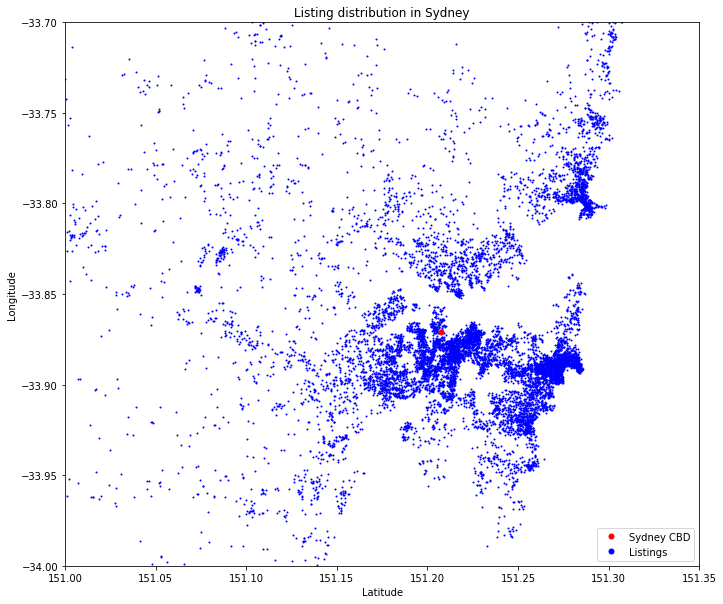

In [11]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
countries = world[world['name'] == "Australia"]
base = countries.plot(linestyle='none', alpha = 0)
red_dot = mlines.Line2D([], [], linestyle='none', color="red", marker='o', markersize=5, label='Sydney CBD')
blue_dot = mlines.Line2D([], [], linestyle='none', color="blue", marker='o', markersize=5, label='Listings')
plt.legend(handles=[red_dot, blue_dot])
sydneyList.plot(ax=base, marker='o', color='blue', markersize=1)
plt.plot([sydneylon], [sydneylat], marker='o', color='red', markersize=5, alpha=1)
plt.ylim([-34,-33.7])
plt.xlim([151,151.35])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Listing distribution in Sydney')
plt.savefig('Map1.png')

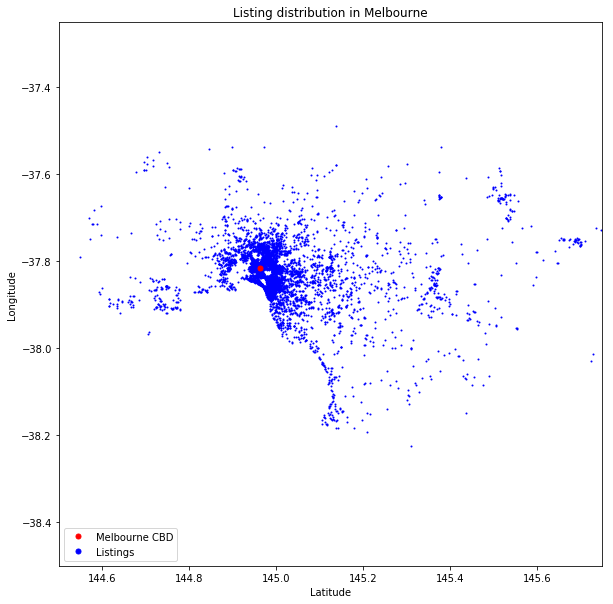

In [12]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
countries = world[world['name'] == "Australia"]
base = countries.plot(linestyle='none', alpha = 0)
red_dot = mlines.Line2D([], [], linestyle='none', color="red", marker='o', markersize=5, label='Melbourne CBD')
blue_dot = mlines.Line2D([], [], linestyle='none', color="blue", marker='o', markersize=5, label='Listings')
plt.legend(handles=[red_dot, blue_dot])
melbList.plot(ax=base, marker='o', color='blue', markersize=1)
plt.plot([melblon], [melblat], marker='o', color='red', markersize=5, alpha=1)
plt.ylim([-38.5,-37.25])
plt.xlim([144.5,145.75])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Listing distribution in Melbourne')
plt.savefig('Map2.png')

In [13]:
sortbydistance = sydData.sort_values(["distance_from_cbd"], axis=0, ascending=[True])
sortbydistance.index = range(0, len(sortbydistance))
sortbydistance.iloc[-1]
sortbydistance2 = melData.sort_values(["distance_from_cbd"], axis=0, ascending=[True])
sortbydistance2.index = range(0, len(sortbydistance2))
sortbydistance2.iloc[-1]

id                                                                    15277956
name                                            Escape to nature. Single room.
host_id                                                               82786047
host_name                                                                Daisy
neighbourhood_group                                                        NaN
neighbourhood                                                     Yarra Ranges
latitude                                                              -37.7072
longitude                                                              145.839
room_type                                                         Private room
price                                                                       34
minimum_nights                                                               1
number_of_reviews                                                            0
last_review                                         

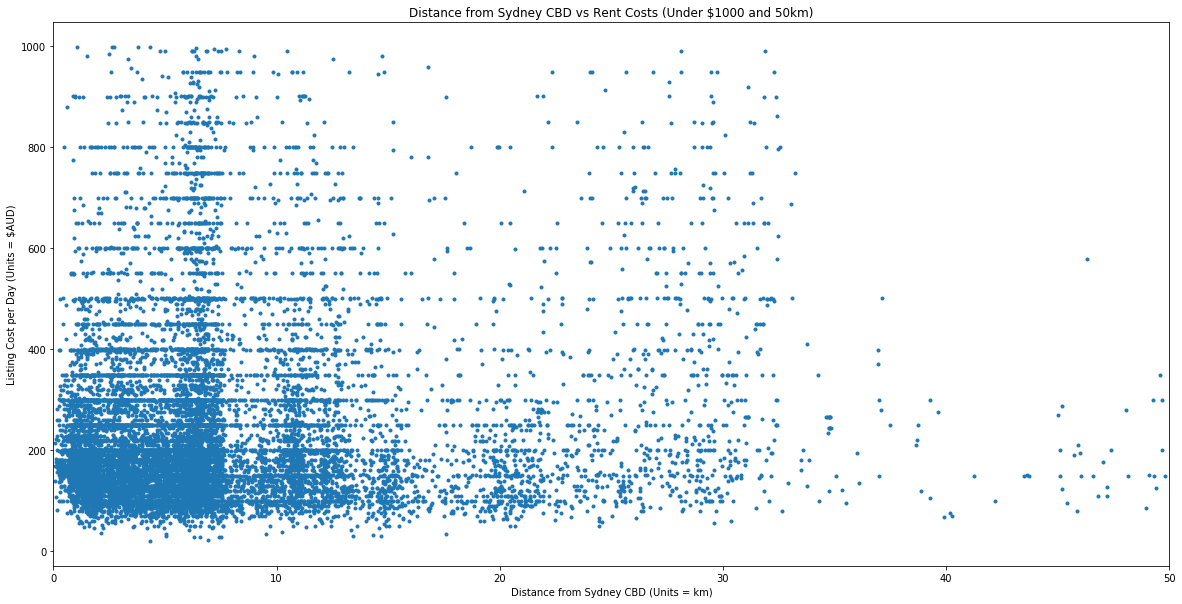

In [14]:
y = sortbydistance["price"][(sortbydistance["price"] < 1000) & (sortbydistance["room_type"] == "Entire home/apt")]
x = sortbydistance["distance_from_cbd"][(sortbydistance["price"] < 1000) & (sortbydistance["room_type"] == "Entire home/apt")]
plt.title('Distance from Sydney CBD vs Rent Costs (Under $1000 and 50km)')
plt.xlabel('Distance from Sydney CBD (Units = km)')
plt.ylabel('Listing Cost per Day (Units = $AUD)')
plt.xlim([0,50])
plt.plot(x, y, '.')
plt.savefig('RentvsDistanceSyd.jpg')

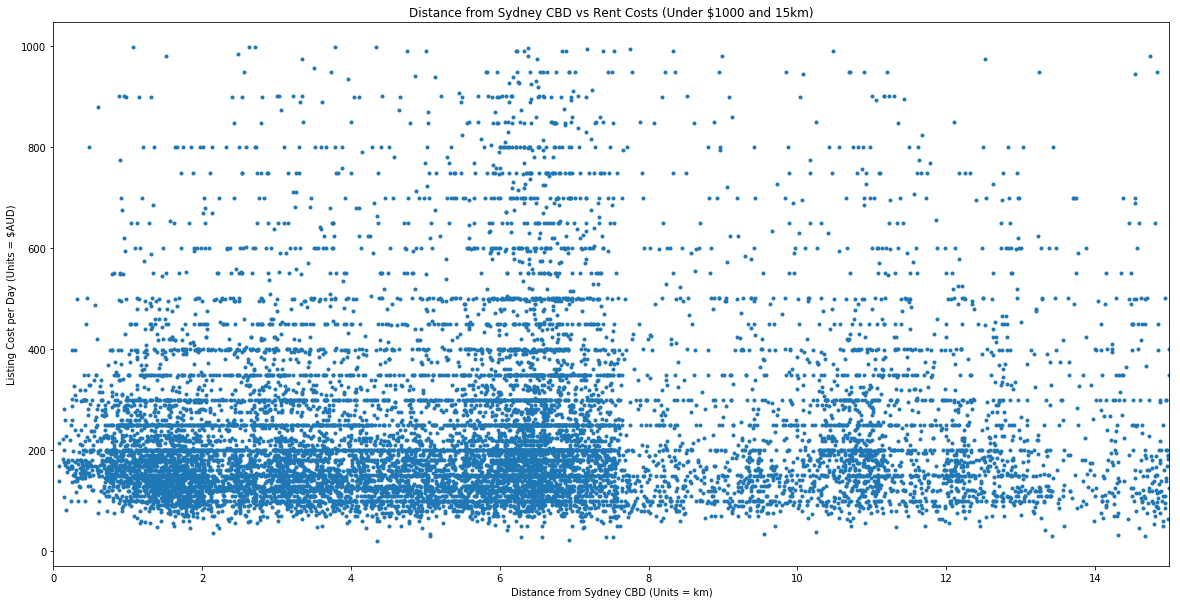

In [15]:
y = sortbydistance["price"][(sortbydistance["price"] < 1000) & (sortbydistance["room_type"] == "Entire home/apt")]
x = sortbydistance["distance_from_cbd"][(sortbydistance["price"] < 1000) & (sortbydistance["room_type"] == "Entire home/apt")]
plt.title('Distance from Sydney CBD vs Rent Costs (Under $1000 and 15km)')
plt.xlabel('Distance from Sydney CBD (Units = km)')
plt.ylabel('Listing Cost per Day (Units = $AUD)')
plt.xlim([0,15])
plt.plot(x, y, '.')
plt.savefig('RentvsDistanceSyd2.jpg')

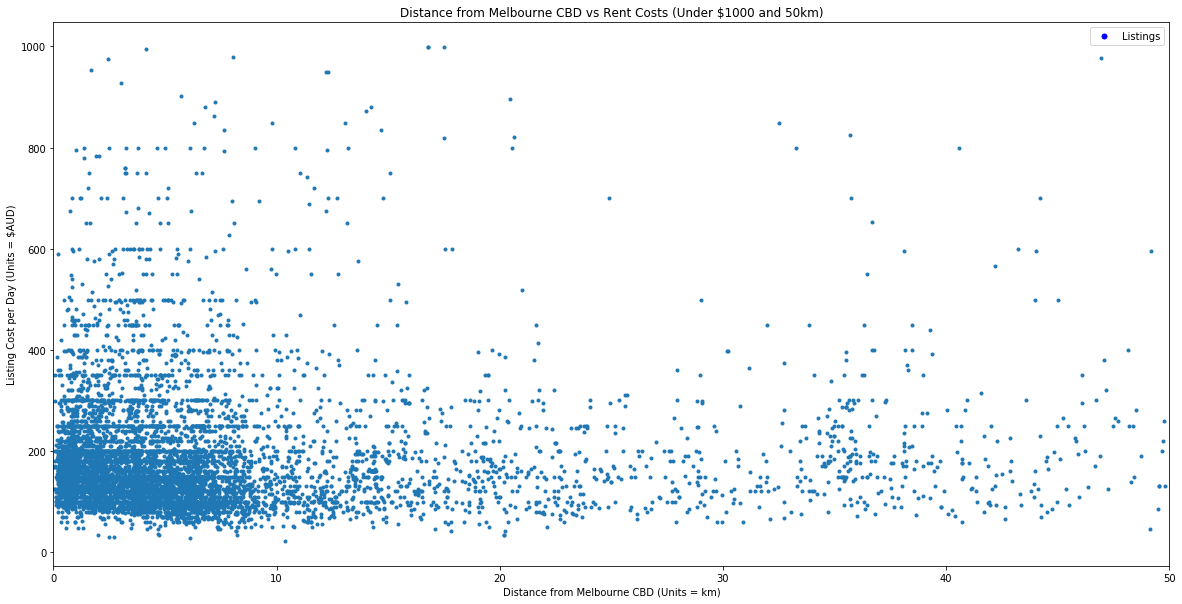

In [16]:
y = sortbydistance2["price"][(sortbydistance2["price"] < 1000) & (sortbydistance2["room_type"] == "Entire home/apt")]
x = sortbydistance2["distance_from_cbd"][(sortbydistance2["price"] < 1000) & (sortbydistance2["room_type"] == "Entire home/apt")]
blue_dot = mlines.Line2D([], [], linestyle='none', color="blue", marker='o', markersize=5, label='Listings')
plt.legend(handles=[blue_dot])
plt.title('Distance from Melbourne CBD vs Rent Costs (Under $1000 and 50km)')
plt.xlabel('Distance from Melbourne CBD (Units = km)')
plt.ylabel('Listing Cost per Day (Units = $AUD)')
plt.xlim([0,50])
plt.plot(x, y, '.')
plt.savefig('RentvsDistanceMelb.jpg')

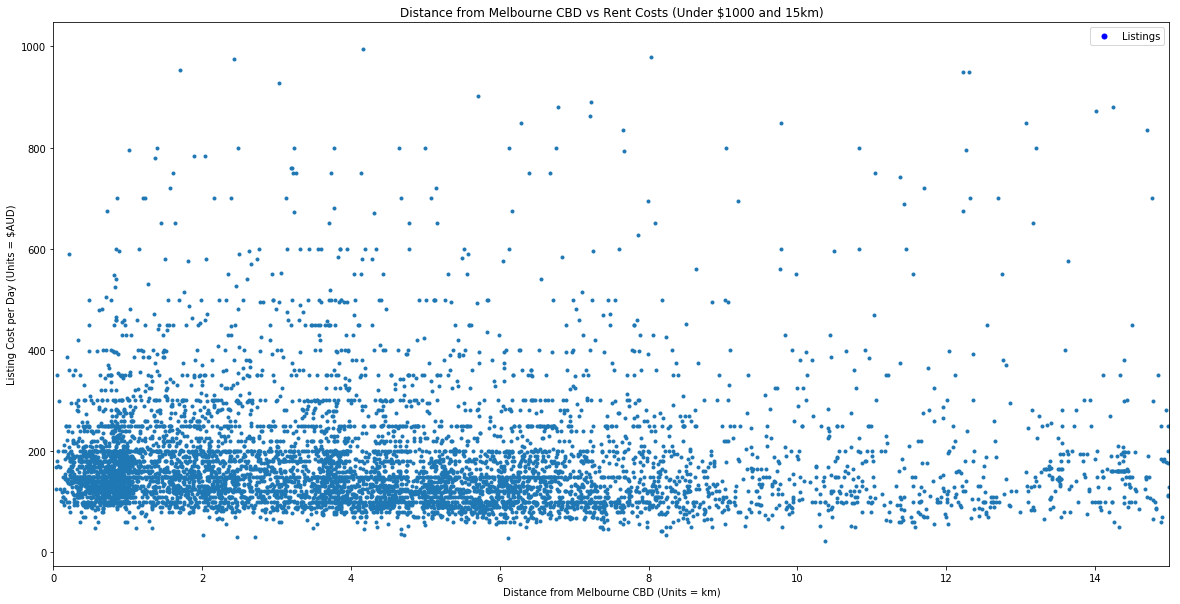

In [17]:
y = sortbydistance2["price"][(sortbydistance2["price"] < 1000) & (sortbydistance2["room_type"] == "Entire home/apt")]
x = sortbydistance2["distance_from_cbd"][(sortbydistance2["price"] < 1000) & (sortbydistance2["room_type"] == "Entire home/apt")]
blue_dot = mlines.Line2D([], [], linestyle='none', color="blue", marker='o', markersize=5, label='Listings')
plt.legend(handles=[blue_dot])
plt.title('Distance from Melbourne CBD vs Rent Costs (Under $1000 and 15km)')
plt.xlabel('Distance from Melbourne CBD (Units = km)')
plt.ylabel('Listing Cost per Day (Units = $AUD)')
plt.xlim([0,15])
plt.plot(x, y, '.')
plt.savefig('RentvsDistanceMelb2.jpg')

In [18]:
countarea = sortbydistance["neighbourhood"][(sortbydistance["price"] < 1000) & (sortbydistance["room_type"] == "Entire home/apt")]
sortbydistance["neighbourhood"][(sortbydistance["price"] < 1000) & (sortbydistance["room_type"] == "Entire home/apt")].value_counts()
countarea2 = sortbydistance2["neighbourhood"][(sortbydistance2["price"] < 1000) & (sortbydistance2["room_type"] == "Entire home/apt")]
sortbydistance2["neighbourhood"][(sortbydistance2["price"] < 1000) & (sortbydistance2["room_type"] == "Entire home/apt")].value_counts()

Melbourne            2415
Port Phillip         1434
Yarra                 904
Stonnington           720
Yarra Ranges          338
Moreland              335
Boroondara            233
Darebin               232
Glen Eira             196
Bayside               190
Maribyrnong           156
Moonee Valley         112
Hobsons Bay            96
Kingston               92
Whitehorse             90
Manningham             79
Monash                 78
Frankston              73
Wyndham                61
Banyule                50
Cardinia               46
Hume                   42
Nillumbik              41
Maroondah              29
Knox                   27
Brimbank               18
Greater Dandenong      15
Casey                  14
Whittlesea             12
Melton                 11
Name: neighbourhood, dtype: int64

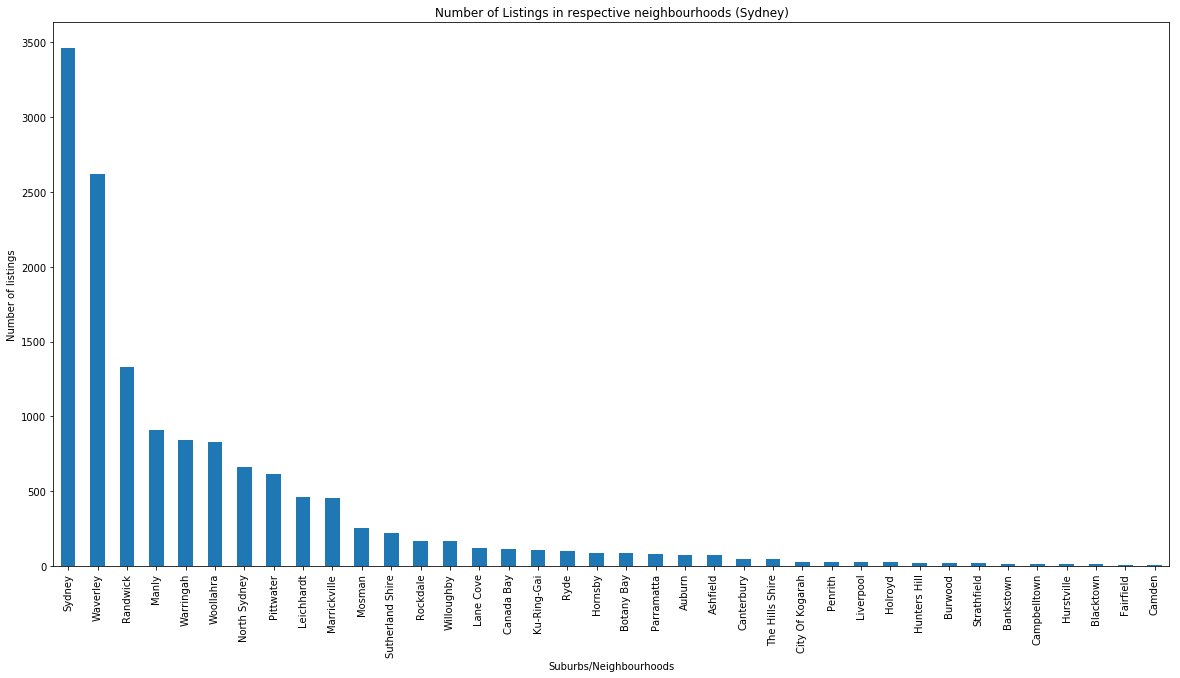

In [19]:
sortbydistance["neighbourhood"][(sortbydistance["price"] < 1000) & (sortbydistance["room_type"] == "Entire home/apt")].value_counts().plot(kind='bar')
plt.xlabel("Suburbs/Neighbourhoods")
plt.ylabel("Number of listings")
plt.title('Number of Listings in respective neighbourhoods (Sydney)')
plt.savefig('ListingsSyd.png')

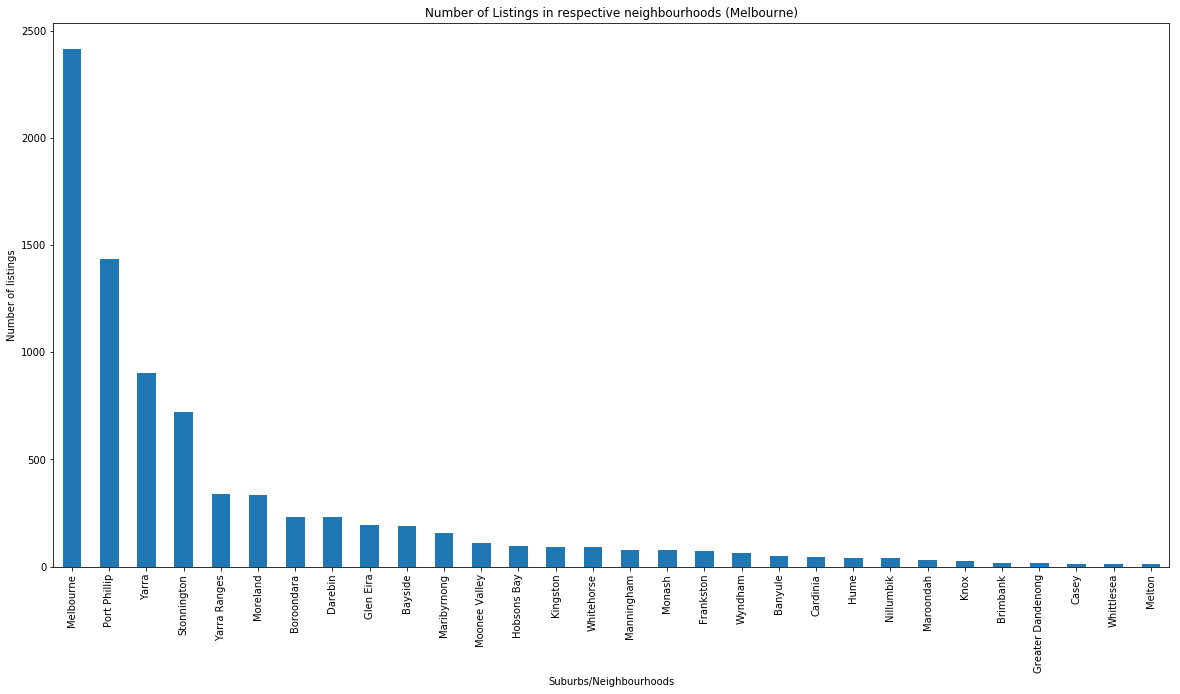

In [20]:
sortbydistance2["neighbourhood"][(sortbydistance2["price"] < 1000) & (sortbydistance2["room_type"] == "Entire home/apt")].value_counts().plot(kind='bar')
plt.xlabel("Suburbs/Neighbourhoods")
plt.ylabel("Number of listings")
plt.title('Number of Listings in respective neighbourhoods (Melbourne)')
plt.savefig('ListingsMelb.png')

In [21]:
arealist = list(set(countarea))
print(arealist)
countarea = list(countarea)
countnums = map(lambda x: countarea.count(arealist[x]), range(0, len(arealist)))
print(countnums)
arealist2 = list(set(countarea2))
print(arealist2)
countarea2 = list(countarea2)
countnums2 = map(lambda x: countarea2.count(arealist2[x]), range(0, len(arealist2)))
print(countnums2)
    

['Hornsby', 'Parramatta', 'Sydney', 'Rockdale', 'Blacktown', 'Marrickville', 'Fairfield', 'North Sydney', 'Ku-Ring-Gai', 'Woollahra', 'Randwick', 'City Of Kogarah', 'Penrith', 'Mosman', 'Holroyd', 'Willoughby', 'Warringah', 'Camden', 'Ryde', 'Burwood', 'Lane Cove', 'Bankstown', 'Strathfield', 'Liverpool', 'Ashfield', 'Canterbury', 'Sutherland Shire', 'Campbelltown', 'Waverley', 'Hunters Hill', 'Canada Bay', 'Pittwater', 'Leichhardt', 'Auburn', 'Botany Bay', 'Manly', 'Hurstville', 'The Hills Shire']
[89, 81, 3460, 170, 14, 452, 10, 663, 107, 831, 1333, 28, 27, 254, 25, 170, 843, 8, 100, 21, 121, 16, 21, 26, 76, 49, 218, 16, 2617, 23, 117, 616, 462, 77, 84, 912, 14, 45]
['Monash', 'Bayside', 'Banyule', 'Port Phillip', 'Glen Eira', 'Darebin', 'Whitehorse', 'Wyndham', 'Hume', 'Stonnington', 'Casey', 'Maribyrnong', 'Knox', 'Brimbank', 'Moonee Valley', 'Yarra Ranges', 'Melbourne', 'Nillumbik', 'Boroondara', 'Manningham', 'Greater Dandenong', 'Whittlesea', 'Hobsons Bay', 'Cardinia', 'Yarra', 

In [22]:
pricearea = sortbydistance["price"][(sortbydistance["price"] < 1000) & (sortbydistance["room_type"] == "Entire home/apt")]
pricearea = list(pricearea)
prices = []
for x in range(0, len(arealist)):
    temp = 0
    for i, j in enumerate(countarea):
        if j == arealist[x]:
            temp += pricearea[i]
    temp = temp / countnums[x]
    prices.append(temp)
print(prices)
pricearea2 = sortbydistance2["price"][(sortbydistance2["price"] < 1000) & (sortbydistance2["room_type"] == "Entire home/apt")]
pricearea2 = list(pricearea2)
prices2 = []
for x in range(0, len(arealist2)):
    temp = 0
    for i, j in enumerate(countarea2):
        if j == arealist2[x]:
            temp += pricearea[i]
    temp = temp / countnums2[x]
    prices2.append(temp)
print(prices2)

[225.76404494382024, 158.65432098765433, 200.19190751445086, 203.18235294117648, 119.85714285714286, 169.84070796460176, 173.69999999999999, 220.1764705882353, 227.42056074766356, 284.8904933814681, 249.46661665416354, 188.39285714285714, 255.33333333333334, 306.55905511811022, 187.80000000000001, 258.34117647058821, 263.30842230130486, 146.625, 158.22, 158.0, 276.62809917355372, 232.375, 149.38095238095238, 207.96153846153845, 174.97368421052633, 161.53061224489795, 217.04587155963301, 177.375, 276.10699273977838, 249.13043478260869, 192.22222222222223, 360.72240259740261, 250.87662337662337, 188.20779220779221, 166.60714285714286, 285.09320175438597, 221.21428571428572, 160.28888888888889]
[307.76923076923077, 277.19473684210527, 238.5, 226.14644351464435, 253.36734693877551, 225.92241379310346, 284.51111111111112, 260.44262295081967, 245.47619047619048, 224.14305555555555, 329.5, 202.17948717948718, 294.25925925925924, 202.0, 222.40178571428572, 262.22781065088759, 210.2530020703933

In [23]:
priceDf = pd.DataFrame(columns=['Suburb', 'Average Price'])
priceDf['Suburb'] = pd.Series(arealist)
priceDf['Average Price'] = pd.Series(prices)
priceDf.head()

,Suburb,Average Price
0,Hornsby,225.764045
1,Parramatta,158.654321
2,Sydney,200.191908
3,Rockdale,203.182353
4,Blacktown,119.857143


In [24]:
priceDf2 = pd.DataFrame(columns=['Suburb', 'Average Price'])
priceDf2['Suburb'] = pd.Series(arealist2)
priceDf2['Average Price'] = pd.Series(prices2)
priceDf2.head()

,Suburb,Average Price
0,Monash,307.769231
1,Bayside,277.194737
2,Banyule,238.500000
3,Port Phillip,226.146444
4,Glen Eira,253.367347


213.249084424


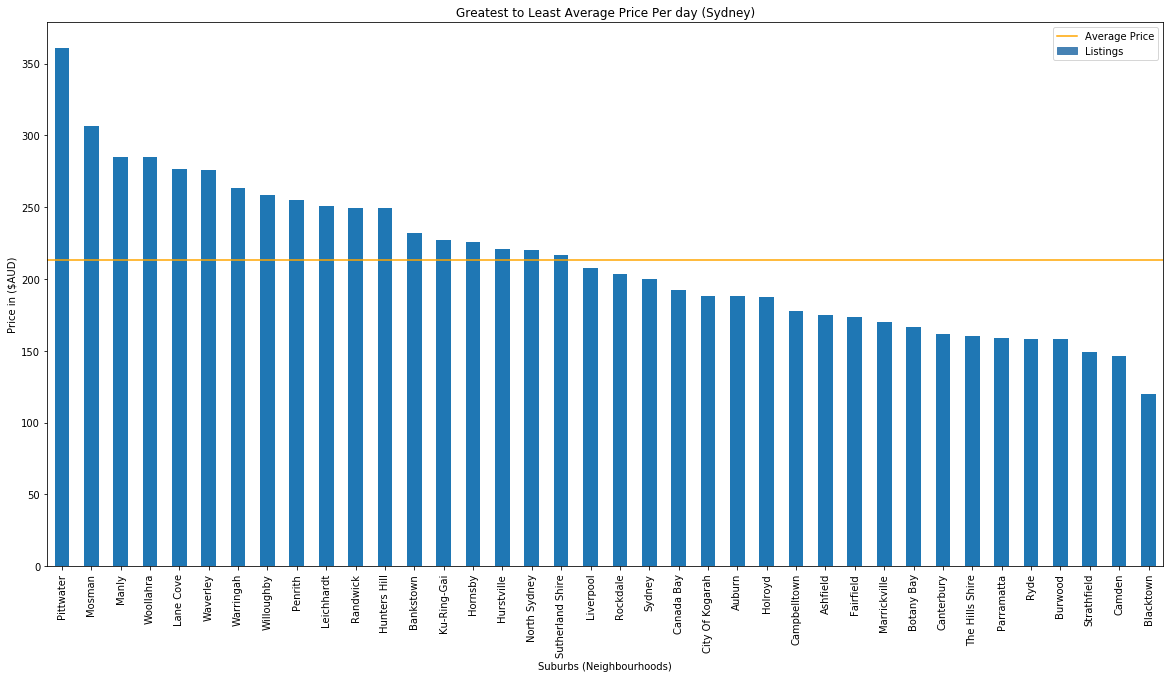

In [32]:
priceavg = sum(prices) / len(prices)
print(priceavg)
sortedPrices = priceDf.sort_values(["Average Price"], axis=0, ascending=[False])
x = sortedPrices['Average Price'].plot(kind='bar')
tags = sortedPrices['Suburb'].tolist()
x.set_xticklabels(tags)
bluepatch = mpatches.Patch(color="steelblue", label='Listings')
orangeline = mlines.Line2D([], [], linestyle='-', color="orange", label='Average Price')
plt.legend(handles=[orangeline, bluepatch])
plt.xlabel("Suburbs (Neighbourhoods)")
plt.ylabel("Price in ($AUD)")
plt.title('Greatest to Least Average Price Per day (Sydney)')
plt.axhline(y=priceavg, color='orange')
plt.savefig('NumListingsSyd.png')

258.533627689


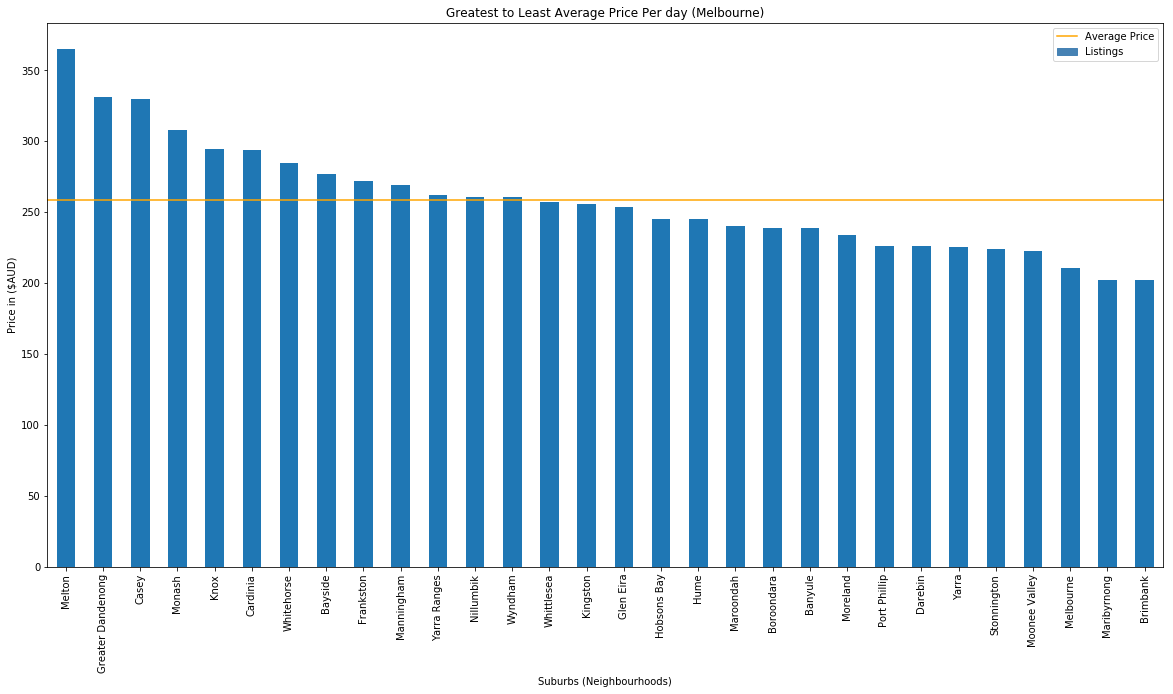

In [31]:
priceavg2 = sum(prices2) / len(prices2)
print(priceavg2)
sortedPrices2 = priceDf2.sort_values(["Average Price"], axis=0, ascending=[False])
x = sortedPrices2['Average Price'].plot(kind='bar')
tags = sortedPrices2['Suburb'].tolist()
x.set_xticklabels(tags)
bluepatch = mpatches.Patch(color="steelblue", label='Listings')
orangeline = mlines.Line2D([], [], linestyle='-', color="orange", label='Average Price')
plt.legend(handles=[orangeline, bluepatch])
plt.xlabel("Suburbs (Neighbourhoods)")
plt.ylabel("Price in ($AUD)")
plt.title('Greatest to Least Average Price Per day (Melbourne)')
plt.axhline(y=priceavg2, color='orange')
plt.savefig('NumListingsMelb.png')

s
